### Barcelona Rainfall prediction. Get and sort data

In [110]:
import pandas as pd
import json
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime
from datetime import date

##### Load all json datasets into pandas dataframes

In [65]:
data0 = pd.read_json('data/aemet_2016_2021.json')
data1 = pd.read_json('data/aemet_2013_2016.json')
data2 = pd.read_json('data/aemet_2009_2012.json')
data3 = pd.read_json('data/aemet_2005_208.json')
data4 = pd.read_json('data/aemet_2001_2004.json')
data5 = pd.read_json('data/aemet_1997_2000.json')
data6 = pd.read_json('data/aemet_1993_1996.json')
data7 = pd.read_json('data/aemet_1987_1991.json')
data8 = pd.read_json('data/aemet_1983_1986.json')

In [242]:
data0.tail(2)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
1774,2021-07-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"25,6","0,0","20,7",Varias,"30,4",Varias,6.0,"2,2","9,7",19:43,"7,4","966,1",00,"963,8",15
1775,2021-07-31,0200E,"BARCELONA, FABRA",BARCELONA,408,"22,0","9,0","15,0",19:50,"28,9",09:37,27.0,"1,7","20,0",19:44,"5,1","965,6",00,"960,8",18


In [243]:
data2.tail(2)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
1459,2012-12-30,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,0",Varias,"14,0",13:42,29,"3,9","12,8",05:06,"8,2","979,4",Varias,"973,7",00
1460,2012-12-31,0200E,"BARCELONA, FABRA",BARCELONA,408,"9,0","0,0","5,9",08:45,"12,0",14:36,25,"4,7","12,2",22:42,"8,4","979,3",00,"968,2",24


In [66]:
frames=(data8,data7,data6,data5,data4,data3,data2,data1,data0)
df=pd.concat(frames)
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,1983-03-01,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,0","0,0","6,6",06:15,"13,4",14:15,27.0,"2,8","8,1",04:30,"3,8","970,3",00,"967,5",15
1,1983-03-02,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,7","0,0","6,8",00:15,"10,6",12:30,20.0,"1,1","8,1",15:00,"0,3","976,8",24,"970,1",00
2,1983-03-03,0200E,"BARCELONA, FABRA",BARCELONA,408,"8,4","0,0","5,4",08:00,"11,4",12:50,5.0,"1,4","6,1",06:00,"2,8","980,3",24,"976,8",00
3,1983-03-04,0200E,"BARCELONA, FABRA",BARCELONA,408,"7,4","0,0","4,4",05:00,"10,4",13:15,27.0,"1,9","10,0",19:30,"0,0","981,3",12,"980,3",06
4,1983-03-05,0200E,"BARCELONA, FABRA",BARCELONA,408,"10,7","0,0","7,4",06:00,"14,0",11:15,32.0,"0,8","8,9",00:30,"0,7","980,9",12,"979,1",04


<b>SELECTED COLUMNS:</b><br><br>
<b>fecha:</b> date<br>
<b>tmed:</b> mean temperature<br>
<b>tmin:</b> minimum temperature<br>
<b>tmax:</b> maximum temperature<br>
<b>sol:</b> daylight<br>
<b>presMax:</b> maximum preassure at station level<br>
<b>presMin:</b> minimum preassure at station level<br>
<b>velmedia:</b> wind mean speed<br>
<b>dir:</b> wind max gust direction<br>
<b>prec:</b> Daily rainfall, from  07 a 07

In [67]:
#columnslist=('fecha','tmed','prec','tmin','tmax','sol','dir','presMax','presMin','velmedia')
df=df[['fecha','tmed','tmin','tmax','sol','presMax','presMin','velmedia','dir','prec']]
df

,fecha,tmed,tmin,tmax,sol,presMax,presMin,velmedia,dir,prec
0,1983-03-01,"10,0","6,6","13,4","3,8","970,3","967,5","2,8",27.0,"0,0"
1,1983-03-02,"8,7","6,8","10,6","0,3","976,8","970,1","1,1",20.0,"0,0"
2,1983-03-03,"8,4","5,4","11,4","2,8","980,3","976,8","1,4",5.0,"0,0"
3,1983-03-04,"7,4","4,4","10,4","0,0","981,3","980,3","1,9",27.0,"0,0"
4,1983-03-05,"10,7","7,4","14,0","0,7","980,9","979,1","0,8",32.0,"0,0"
...,...,...,...,...,...,...,...,...,...,...
1771,2021-07-27,"24,8","19,8","29,9","13,1","968,5","966,2","6,4",21.0,"0,0"
1772,2021-07-28,"25,2","19,7","30,6","12,5","968,8","966,5","3,1",8.0,"0,0"
1773,2021-07-29,"25,1","19,9","30,3","12,9","968,8","965,9","3,1",20.0,"0,0"
1774,2021-07-30,"25,6","20,7","30,4","7,4","966,1","963,8","2,2",6.0,"0,0"


In [96]:
df.isnull().sum()

fecha         0
tmed          0
tmin          0
tmax          0
sol          21
presMax      16
presMin     159
velmedia     50
dir         295
prec          0
dtype: int64

In [54]:
len(df)

13667

In [83]:
# Delete Nan values because there is a little amount of null values,
#as they can't be predicted from the rest of the values
df1=df.dropna()
df1.reset_index(inplace = True, drop = True)
#replace Ip for 0
df1.loc[df1['prec'] == 'Ip', 'prec'] = 0

In [86]:
df1['tmed'] = df1['tmed'].str.replace(',','.').astype('float64')
df1['tmin'] = df1['tmin'].str.replace(',','.').astype('float64')
df1['tmax'] = df1['tmax'].str.replace(',','.').astype('float64')
df1['sol'] = df1['sol'].str.replace(',','.').astype('float64')
df1['presMax'] = df1['presMax'].str.replace(',','.').astype('float64')
df1['presMin'] = df1['presMin'].str.replace(',','.').astype('float64')
df1['velmedia'] = df1['velmedia'].str.replace(',','.').astype('float64')
df1['prec'] = df1['prec'].str.replace(',','.').astype('float64')

In [93]:
# REtransfrom som values to 0
df1['prec'] = df1['prec'].fillna(0)

In [97]:
#save database
df1.to_csv('primera_bd.csv')

In [98]:
df1.head()

,fecha,tmed,tmin,tmax,sol,presMax,presMin,velmedia,dir,prec
0,1983-03-01,10.0,6.6,13.4,3.8,970.3,967.5,2.8,27.0,0.0
1,1983-03-02,8.7,6.8,10.6,0.3,976.8,970.1,1.1,20.0,0.0
2,1983-03-03,8.4,5.4,11.4,2.8,980.3,976.8,1.4,5.0,0.0
3,1983-03-04,7.4,4.4,10.4,0.0,981.3,980.3,1.9,27.0,0.0
4,1983-03-05,10.7,7.4,14.0,0.7,980.9,979.1,0.8,32.0,0.0


<br><br><br>
##### Load and join the humidity data

In [99]:
humitatdf=pd.read_csv('humidity.csv',index_col=[0])
humitatdf

,humidity,fecha
0,65.0,2006-03-01
1,62.0,2006-03-02
2,53.0,2006-03-03
3,64.0,2006-03-04
4,63.0,2006-03-05
...,...,...
13407,60.0,1987-07-27
13408,77.0,1987-07-28
13409,79.0,1987-07-29
13410,83.0,1987-07-30


In [100]:
newdf=pd.merge(df1,humitatdf, on='fecha')
newdf

,fecha,tmed,tmin,tmax,sol,presMax,presMin,velmedia,dir,prec,humidity
0,1983-03-01,10.0,6.6,13.4,3.8,970.3,967.5,2.8,27.0,0.0,71.0
1,1983-03-02,8.7,6.8,10.6,0.3,976.8,970.1,1.1,20.0,0.0,72.0
2,1983-03-03,8.4,5.4,11.4,2.8,980.3,976.8,1.4,5.0,0.0,66.0
3,1983-03-04,7.4,4.4,10.4,0.0,981.3,980.3,1.9,27.0,0.0,84.0
4,1983-03-05,10.7,7.4,14.0,0.7,980.9,979.1,0.8,32.0,0.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...
13125,2021-07-27,24.8,19.8,29.9,13.1,968.5,966.2,6.4,21.0,0.0,68.0
13126,2021-07-28,25.2,19.7,30.6,12.5,968.8,966.5,3.1,8.0,0.0,72.0
13127,2021-07-29,25.1,19.9,30.3,12.9,968.8,965.9,3.1,20.0,0.0,72.0
13128,2021-07-30,25.6,20.7,30.4,7.4,966.1,963.8,2.2,6.0,0.0,78.0


In [101]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13130 entries, 0 to 13129
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     13130 non-null  object 
 1   tmed      13130 non-null  float64
 2   tmin      13130 non-null  float64
 3   tmax      13130 non-null  float64
 4   sol       13130 non-null  float64
 5   presMax   13130 non-null  float64
 6   presMin   13130 non-null  float64
 7   velmedia  13130 non-null  float64
 8   dir       13130 non-null  float64
 9   prec      13130 non-null  float64
 10  humidity  13083 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.2+ MB


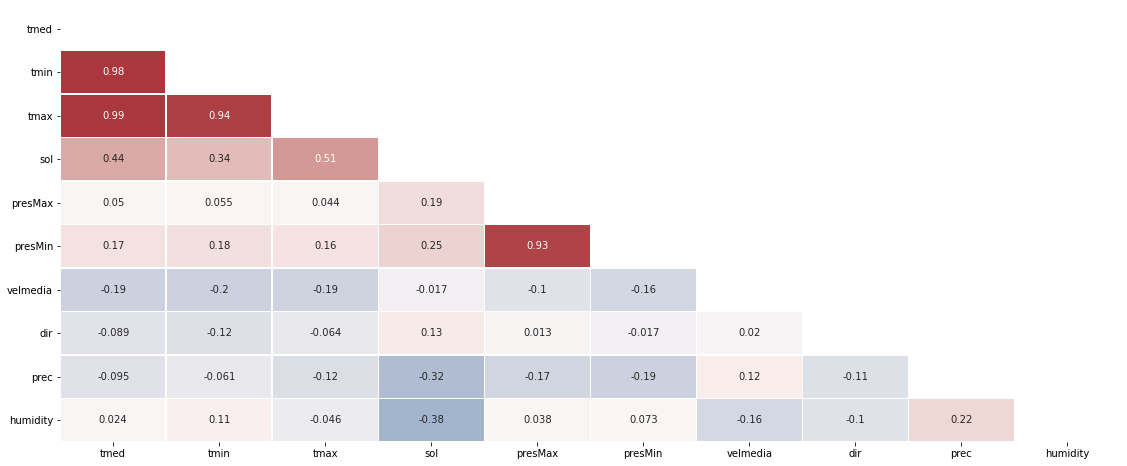

In [102]:
# check correlation to discard columns if necessary
corr = newdf.corr()
cmap = sns.light_palette("#0c2a70", as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(19,8))
sns.heatmap(corr, cmap='vlag', annot=True, linewidths=0.5, center=0.05, cbar=False, xticklabels=True,
           mask=mask)

In [103]:
#tmin,tmax and presMin are highly correlated to other attributes
newdf=newdf.drop(['tmin','tmax','presMin'],axis=1)
newdf

,fecha,tmed,sol,presMax,velmedia,dir,prec,humidity
0,1983-03-01,10.0,3.8,970.3,2.8,27.0,0.0,71.0
1,1983-03-02,8.7,0.3,976.8,1.1,20.0,0.0,72.0
2,1983-03-03,8.4,2.8,980.3,1.4,5.0,0.0,66.0
3,1983-03-04,7.4,0.0,981.3,1.9,27.0,0.0,84.0
4,1983-03-05,10.7,0.7,980.9,0.8,32.0,0.0,84.0
...,...,...,...,...,...,...,...,...
13125,2021-07-27,24.8,13.1,968.5,6.4,21.0,0.0,68.0
13126,2021-07-28,25.2,12.5,968.8,3.1,8.0,0.0,72.0
13127,2021-07-29,25.1,12.9,968.8,3.1,20.0,0.0,72.0
13128,2021-07-30,25.6,7.4,966.1,2.2,6.0,0.0,78.0


In [104]:
# add previous days data
newdf['humidity-1']=newdf['humidity'].shift(1)
newdf['humidity-2']=newdf['humidity'].shift(2)
newdf['humidity-3']=newdf['humidity'].shift(3)
newdf['velmedia-1']=newdf['velmedia'].shift(1)
newdf['velmedia-2']=newdf['velmedia'].shift(2)
newdf['velmedia-3']=newdf['velmedia'].shift(3)
newdf['dir-1']=newdf['dir'].shift(1)
newdf['dir-2']=newdf['dir'].shift(2)
newdf['dir-3']=newdf['dir'].shift(3)
newdf['prec-1']=newdf['prec'].shift(1)
newdf['prec-2']=newdf['prec'].shift(2)
newdf['prec-3']=newdf['prec'].shift(3)
newdf['tmed-1']=newdf['tmed'].shift(1)
newdf['tmed-2']=newdf['tmed'].shift(2)
newdf['tmed-3']=newdf['tmed'].shift(3)
newdf['presMax-1']=newdf['presMax'].shift(1)
newdf['presMax-2']=newdf['presMax'].shift(2)
newdf['presMax-3']=newdf['presMax'].shift(3)
newdf

,fecha,tmed,sol,presMax,velmedia,dir,prec,humidity,humidity-1,humidity-2,...,dir-3,prec-1,prec-2,prec-3,tmed-1,tmed-2,tmed-3,presMax-1,presMax-2,presMax-3
0,1983-03-01,10.0,3.8,970.3,2.8,27.0,0.0,71.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1983-03-02,8.7,0.3,976.8,1.1,20.0,0.0,72.0,71.0,NaN,...,NaN,0.0,NaN,NaN,10.0,NaN,NaN,970.3,NaN,NaN
2,1983-03-03,8.4,2.8,980.3,1.4,5.0,0.0,66.0,72.0,71.0,...,NaN,0.0,0.0,NaN,8.7,10.0,NaN,976.8,970.3,NaN
3,1983-03-04,7.4,0.0,981.3,1.9,27.0,0.0,84.0,66.0,72.0,...,27.0,0.0,0.0,0.0,8.4,8.7,10.0,980.3,976.8,970.3
4,1983-03-05,10.7,0.7,980.9,0.8,32.0,0.0,84.0,84.0,66.0,...,20.0,0.0,0.0,0.0,7.4,8.4,8.7,981.3,980.3,976.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,2021-07-27,24.8,13.1,968.5,6.4,21.0,0.0,68.0,62.0,67.0,...,11.0,0.0,0.0,0.0,24.4,25.6,26.4,968.6,965.2,964.1
13126,2021-07-28,25.2,12.5,968.8,3.1,8.0,0.0,72.0,68.0,62.0,...,16.0,0.0,0.0,0.0,24.8,24.4,25.6,968.5,968.6,965.2
13127,2021-07-29,25.1,12.9,968.8,3.1,20.0,0.0,72.0,72.0,68.0,...,31.0,0.0,0.0,0.0,25.2,24.8,24.4,968.8,968.5,968.6
13128,2021-07-30,25.6,7.4,966.1,2.2,6.0,0.0,78.0,72.0,72.0,...,21.0,0.0,0.0,0.0,25.1,25.2,24.8,968.8,968.8,968.5


In [106]:
newdf.isnull().sum()

fecha          0
tmed           0
sol            0
presMax        0
velmedia       0
dir            0
prec           0
humidity      47
humidity-1    48
humidity-2    49
humidity-3    50
velmedia-1     1
velmedia-2     2
velmedia-3     3
dir-1          1
dir-2          2
dir-3          3
prec-1         1
prec-2         2
prec-3         3
tmed-1         1
tmed-2         2
tmed-3         3
presMax-1      1
presMax-2      2
presMax-3      3
dtype: int64

In [107]:
#delete the few rows with NaN values
newdf=newdf.dropna()

In [111]:
newdf['fecha'] = pd.to_datetime(newdf['fecha'])
newdf['fecha'] = pd.to_datetime(newdf['fecha'], format="%d/%m/%Y")

,fecha,tmed,sol,presMax,velmedia,dir,prec,humidity,humidity-1,humidity-2,...,dir-3,prec-1,prec-2,prec-3,tmed-1,tmed-2,tmed-3,presMax-1,presMax-2,presMax-3
3,1983-03-04,7.4,0.0,981.3,1.9,27.0,0.0,84.0,66.0,72.0,...,27.0,0.0,0.0,0.0,8.4,8.7,10.0,980.3,976.8,970.3
4,1983-03-05,10.7,0.7,980.9,0.8,32.0,0.0,84.0,84.0,66.0,...,20.0,0.0,0.0,0.0,7.4,8.4,8.7,981.3,980.3,976.8
5,1983-03-06,8.9,0.2,980.0,1.4,32.0,0.0,79.0,84.0,84.0,...,5.0,0.0,0.0,0.0,10.7,7.4,8.4,980.9,981.3,980.3
6,1983-03-07,10.6,7.9,980.0,1.9,32.0,0.0,82.0,79.0,84.0,...,27.0,0.0,0.0,0.0,8.9,10.7,7.4,980.0,980.9,981.3
7,1983-03-08,11.5,9.4,978.1,2.2,32.0,0.0,76.0,82.0,79.0,...,32.0,0.0,0.0,0.0,10.6,8.9,10.7,980.0,980.0,980.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,2021-07-27,24.8,13.1,968.5,6.4,21.0,0.0,68.0,62.0,67.0,...,11.0,0.0,0.0,0.0,24.4,25.6,26.4,968.6,965.2,964.1
13126,2021-07-28,25.2,12.5,968.8,3.1,8.0,0.0,72.0,68.0,62.0,...,16.0,0.0,0.0,0.0,24.8,24.4,25.6,968.5,968.6,965.2
13127,2021-07-29,25.1,12.9,968.8,3.1,20.0,0.0,72.0,72.0,68.0,...,31.0,0.0,0.0,0.0,25.2,24.8,24.4,968.8,968.5,968.6
13128,2021-07-30,25.6,7.4,966.1,2.2,6.0,0.0,78.0,72.0,72.0,...,21.0,0.0,0.0,0.0,25.1,25.2,24.8,968.8,968.8,968.5


In [113]:
newdf.to_csv('barcelona_rain.csv')